In [58]:
import pandas as pd
from seaborn import scatterplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
df = pd.read_csv('data.csv', header=None)
print(df.describe())
df.head(100)

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [60]:
# checking for duplicates
duplicates = df.duplicated()
print(f"amount of duplicated rows: {duplicates.sum()}\n")

# inspecting duplicated rows
if duplicates.sum() > 0:
    print(f"duplicated rows: \n{df[duplicates]}")
    
    # dropping duplicates
    df = df.drop_duplicates()

    # checking for duplicates after dropping
    print(f"\namount of duplicated rows: {df.duplicated().sum()}\n")



amount of duplicated rows: 3

duplicated rows: 
       0    1    2    3          4
34   4.9  3.1  1.5  0.1     setosa
37   4.9  3.1  1.5  0.1     setosa
142  5.8  2.7  5.1  1.9  virginica

amount of duplicated rows: 0



In [61]:
# check for missing values
print(f"missing values: \n{df.isnull().sum()}\n")
# check for nan values 
print(f"NaN values: \n{df.isna().sum()}")

missing values: 
0    0
1    0
2    0
3    0
4    0
dtype: int64

NaN values: 
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [62]:
# Scaling the data
min_max_scaler = MinMaxScaler()
df.iloc[:, :-3] = min_max_scaler.fit_transform(df.iloc[:, :-3])
df.head()

,0,1,2,3,4
0,0.222222,0.625000,1.4,0.2,setosa
1,0.166667,0.416667,1.4,0.2,setosa
2,0.111111,0.500000,1.3,0.2,setosa
3,0.083333,0.458333,1.5,0.2,setosa
4,0.194444,0.666667,1.4,0.2,setosa


In [63]:
# splitting the data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

<Axes: xlabel='0', ylabel='1'>

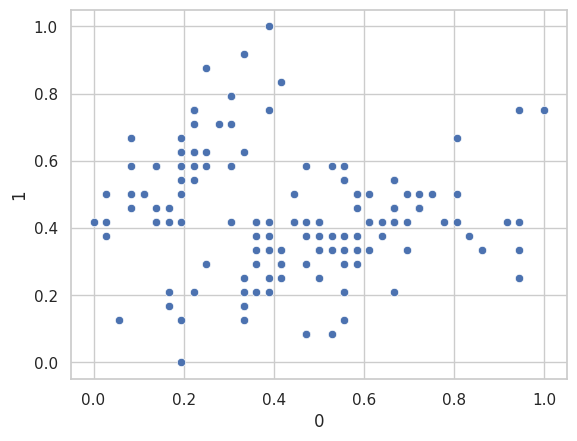

In [64]:
scatterplot(data=df, x=0, y=1)

By this point, data preperation is done. We can proceed with model building and training.

In [65]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# training the KNN model with GridSearchCV hyperparameter tuning (Grid Search Cross Validation)
classifier = KNeighborsClassifier()

param_grid = [{
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}]

grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [71]:
# getting the best hyperparameters 
final_classifier = grid_search.best_estimator_
print(f"best hyperparameters: {grid_search.best_params_}")

best hyperparameters: {'n_neighbors': 5, 'weights': 'uniform'}


In [75]:
#evaluating the model using training data
print("Training summary:")

y_train_pred = final_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

# evaluating the model using test data 
print("\nTesting summary:")
y_pred = final_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Training summary:
Accuracy: 0.9743589743589743
Precision: 0.974556747539862
Recall: 0.9743589743589743
F1 Score: 0.9743549673226186

Testing summary:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333
